# House Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('./housePrice.csv')

In [52]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [60]:
data.describe()

,Area,Room,Price,Price(USD)
count,3473.000000,3473.000000,3.473000e+03,3.473000e+03
mean,106.774547,2.079758,5.354621e+09,1.784874e+05
std,69.365567,0.758764,8.104058e+09,2.701353e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.415000e+09,4.716667e+04
50%,90.000000,2.000000,2.880000e+09,9.600000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [54]:
lst = []
for i in data.Area:
    if ',' in i:
        lst.append(data[data['Area'] == i].index[0])

In [55]:
lst

[570, 709, 807, 1604, 2171, 2802]

In [56]:
data = data.drop(lst)

In [58]:
data['Area'] = data['Area'].astype('int64')

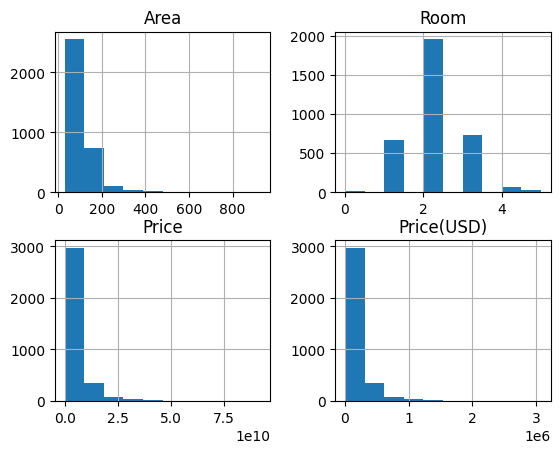

In [63]:
data.hist()
plt.show()

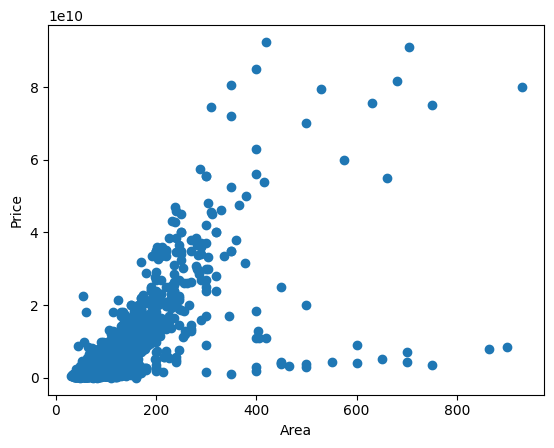

In [78]:
plt.scatter(data['Area'],data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

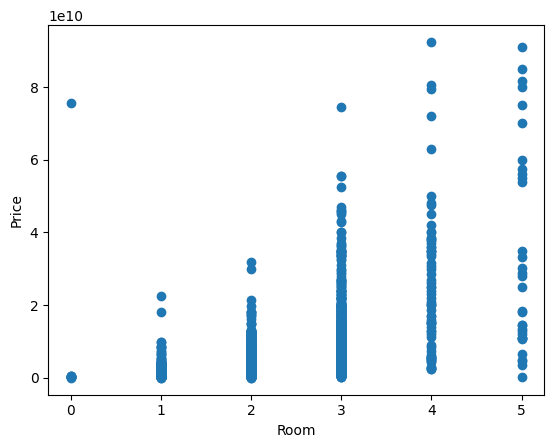

In [79]:
plt.scatter(data['Room'],data['Price'])
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

In [95]:
cdf = data[['Area','Price']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

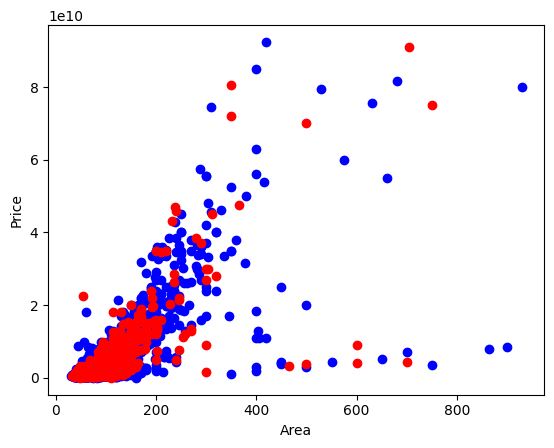

In [97]:
train_x = train[['Area']]
train_y = train[['Price']]

test_x = test[['Area']]
test_y = test[['Price']]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train_x,train_y,color='blue')
ax1.scatter(test_x,test_y,color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(train_x,train_y)

LinearRegression()

In [99]:
print(f'Regression Coeffecients: {regr.coef_}')
print(f'Regression Intercept: {regr.intercept_}')

Regression Coeffecients: [[84005692.03961009]]
Regression Intercept: [-3.62500067e+09]


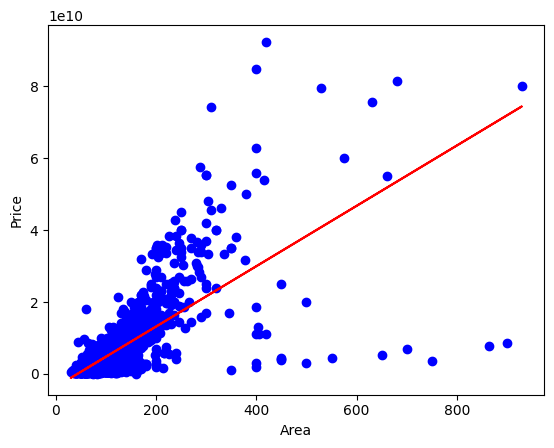

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train_x,train_y,color='blue')
ax1.plot(train_x,regr.intercept_[0] + regr.coef_[0][0]*train_x,color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [103]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(test_x)

print(f'R2-Score: {r2_score(test_y,test_y_)}')

R2-Score: 0.5093599050440327


## Multiple Regression

In [163]:
addresses = data['Address'].unique()

In [169]:
mapped = {}
mapped = {addresses[i]:i for i in range(len(addresses))}

In [170]:
mapped

{'Shahran': 0,
 'Pardis': 1,
 'Shahrake Qods': 2,
 'Shahrake Gharb': 3,
 'North Program Organization': 4,
 'Andisheh': 5,
 'West Ferdows Boulevard': 6,
 'Narmak': 7,
 'Saadat Abad': 8,
 'Zafar': 9,
 'Islamshahr': 10,
 'Pirouzi': 11,
 'Shahrake Shahid Bagheri': 12,
 'Moniriyeh': 13,
 'Velenjak': 14,
 'Amirieh': 15,
 'Southern Janatabad': 16,
 'Salsabil': 17,
 'Zargandeh': 18,
 'Feiz Garden': 19,
 'Water Organization': 20,
 nan: 21,
 'ShahrAra': 22,
 'Gisha': 23,
 'Ray': 24,
 'Abbasabad': 25,
 'Ostad Moein': 26,
 'Farmanieh': 27,
 'Parand': 28,
 'Punak': 29,
 'Qasr-od-Dasht': 30,
 'Aqdasieh': 31,
 'Pakdasht': 32,
 'Railway': 33,
 'Central Janatabad': 34,
 'East Ferdows Boulevard': 35,
 'Pakdasht KhatunAbad': 36,
 'Sattarkhan': 37,
 'Baghestan': 38,
 'Shahryar': 39,
 'Northern Janatabad': 40,
 'Daryan No': 41,
 'Southern Program Organization': 42,
 'Rudhen': 43,
 'West Pars': 44,
 'Afsarieh': 45,
 'Marzdaran': 46,
 'Dorous': 47,
 'Sadeghieh': 48,
 'Chahardangeh': 49,
 'Baqershahr': 50,
 '

In [171]:
data['Address'] = data['Address'].replace(mapped)

In [189]:
data['Address'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [183]:
cut_df = data[['Area','Address','Price']]

msk = np.random.rand(len(data)) < 0.8
train = cut_df[msk]
test = cut_df[~msk]

In [184]:
train_x = train[['Area','Address']]
train_y = train[['Price']]

test_x = test[['Area','Address']]
test_y = test[['Price']]


In [185]:
multiple_regr = LinearRegression()

multiple_regr.fit(train_x,train_y)

LinearRegression()

In [186]:
print(f'Regression Coeffecients: {multiple_regr.coef_}')
print(f'Regression Intercept: {multiple_regr.intercept_}')

Regression Coeffecients: [[79594696.52874029  7281050.29502205]]
Regression Intercept: [-3.58806645e+09]


In [187]:
test_y_ = multiple_regr.predict(test_x)

print(f'R2-Score: {r2_score(test_y,test_y_)}')

R2-Score: 0.5131054370225554
